# Stack Overflow Developer Survey 2025 – Exploratory Insights

This notebook focuses solely on exploratory insights derived from the cleaned SO2025 developer survey dataset.

Following the data cleaning and preparation completed earlier, this analysis explores patterns across:
- Demographics
- Developer experience
- Technology stacks
- Workplace behavior
- Salary and earnings
- AI usage and sentiment

The goal is to uncover meaningful relationships that help explain how developers learn, work, earn, and adapt to evolving technologies.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
from collections import Counter

In [11]:
sns.set_theme(
    style="whitegrid",
    rc={
        "figure.figsize": (12,6),
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "font.family": "sans-serif",
        "font.sans-serif": ["DejaVu Sans"]
    }
)

### 1. Importing Dataset

In [12]:
clean_df = pd.read_csv("../datasets/cleaned_survey_results.csv")

In [13]:
clean_df.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearningMethods,YearsCode,DevType,RemoteWork,...,OpSysProfessional_use,OfficeStackAsyncHaveWorkedWith,CommPlatformHaveWorkedWith,UsedAIBefore,AIModelsHaveWorkedWith,AIToolsUsage,AISentiment,AnnualSalary(USD),AIToolCurrently_partially_AI,AIToolCurrently_mostly_AI
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,Online Courses or Certification (includes all ...,14.0,"Developer, mobile",Remote,...,"['Windows', 'MacOS', 'Android', 'iOS', 'iPadOS']","['Confluence', 'GitHub', 'GitLab', 'Jira', 'Ma...","['Stack Overflow', 'Reddit', 'GitHub (public p...",Yes,"['openAI GPT (chatbot models)', 'openAI Image ...","Yes, I use AI tools monthly or infrequently",Indifferent,61256.0,"['Learning about a codebase', 'Writing code', ...",NaN
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,2.0,Online Courses or Certification (includes all ...,10.0,"Developer, back-end",Hybrid,...,NaN,"['Confluence', 'GitHub', 'Jira']","['Stack Overflow', 'Discord', 'Reddit', 'Dev.t...",Yes,NaN,"Yes, I use AI tools weekly",Indifferent,104413.0,NaN,NaN


In [14]:
clean_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'WorkExp',
       'LearningMethods', 'YearsCode', 'DevType', 'RemoteWork', 'Industry',
       'JobSat', 'AIThreat', 'NewRole', 'Country', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'DevEnvsHaveWorkedWith', 'OpSysPersonal_use',
       'OpSysProfessional_use', 'OfficeStackAsyncHaveWorkedWith',
       'CommPlatformHaveWorkedWith', 'UsedAIBefore', 'AIModelsHaveWorkedWith',
       'AIToolsUsage', 'AISentiment', 'AnnualSalary(USD)',
       'AIToolCurrently_partially_AI', 'AIToolCurrently_mostly_AI'],
      dtype='object')

### 2. Exploratory Data Insights

#### 2.1 Demographics and Background

What percentage of respondents `work as devs by profession` for each `country`?

In [15]:
total_devs_by_countries = clean_df.groupby(['Country']).size()
professional_devs_by_countries = clean_df[clean_df['MainBranch'] == 'I am a developer by profession'].groupby(['Country']).size()

In [16]:
pro_dev_df = pd.DataFrame({
    'total_respondents': total_devs_by_countries,
    'pro_devs': professional_devs_by_countries
})
pro_dev_df = pro_dev_df.reset_index()
pro_dev_df['percent_pro'] = round(pro_dev_df['pro_devs'] / pro_dev_df['total_respondents'] * 100, 2)

top20 = (pro_dev_df[pro_dev_df['total_respondents'] >= 100].sort_values(['percent_pro'],ascending=False).head(20))

In [17]:
top20_plot = top20.copy()

top20_plot['Country'] = top20_plot['Country'].str.replace(
    r',.*', '', regex=True
)

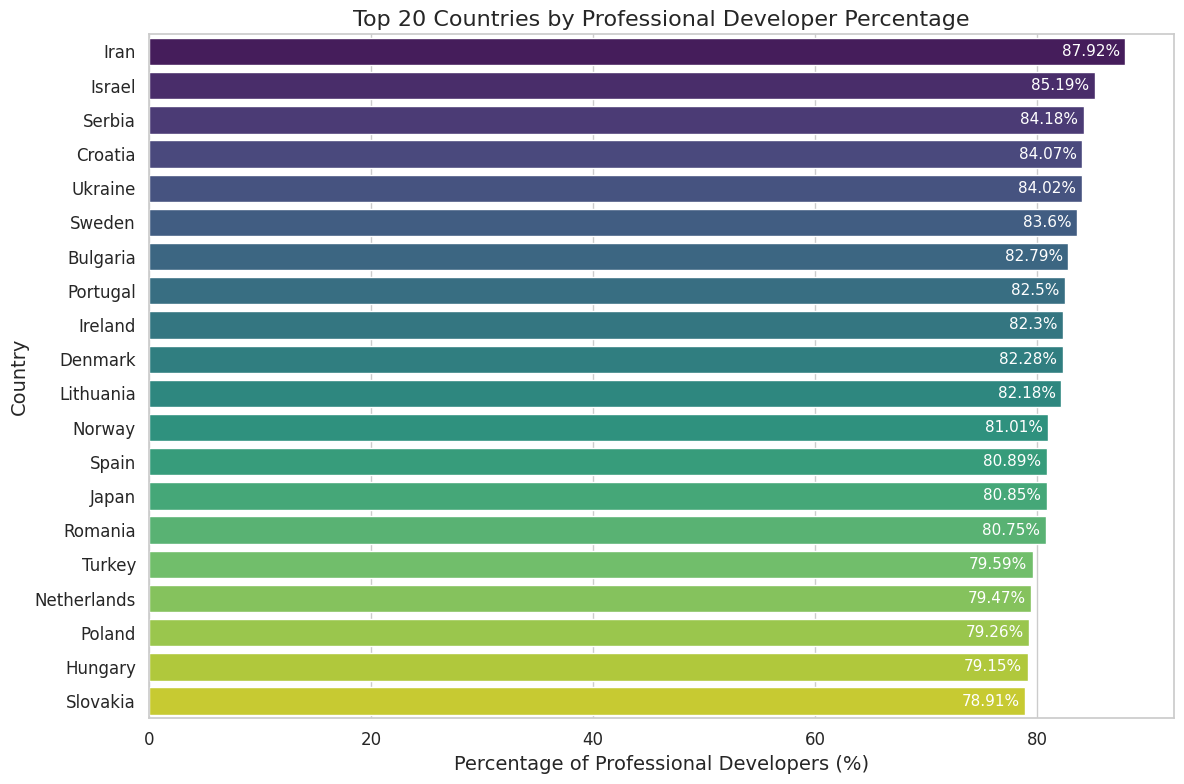

In [18]:
plt.figure(figsize=(12,8))
colors = sns.color_palette("viridis", len(top20_plot['Country']))
sns.barplot(
    data=top20_plot,
    x='percent_pro',
    y='Country',    
    palette=colors,
    hue='Country'
)

for index, value in enumerate(top20_plot['percent_pro']):
    plt.text(value - 0.5, index, f"{value}%", va='center', ha='right', fontsize=11, color='white')

plt.title('Top 20 Countries by Professional Developer Percentage')
plt.xlabel('Percentage of Professional Developers (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

>this plot showcase the top 20 counties which have atleast 100 respondents with highest percentage of repondents working as devs professionally

What is the `age distribution` of developers worldwide?

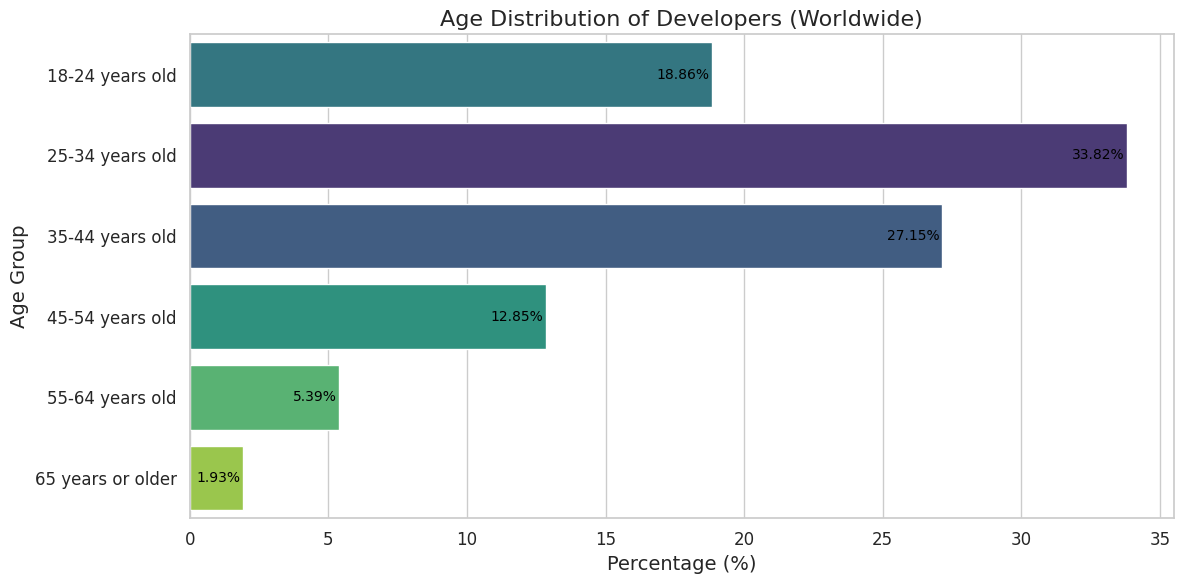

In [19]:
age_filtered = clean_df[clean_df["Age"] != "Prefer not to say"]
age_counts = age_filtered['Age'].value_counts().reset_index()
age_counts.columns = ['Age_Group', 'Count']
age_counts['Percent'] = round(age_counts['Count'] / age_counts['Count'].sum() * 100, 2)

order = [
    '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older'
]
colors = sns.color_palette("viridis", len(order))

sns.barplot(
    data=age_counts,
    x='Percent',
    y='Age_Group',
    order=order,
    palette=colors,
    hue='Age_Group'
)

# Add text labels
ordered_values = age_counts.set_index('Age_Group').loc[order]['Percent']

for idx, value in enumerate(ordered_values):
    plt.text(value-0.1, idx, f"{value}%", va='center', ha='right', fontsize=10, color="black")

plt.title("Age Distribution of Developers (Worldwide)")
plt.xlabel("Percentage (%)")
plt.ylabel("Age Group")
plt.tight_layout()
plt.show()

What is the `Employed count` distribution across different `countries`?

In [20]:
total_country = clean_df.groupby(['Country'])['Employment'].size()

In [21]:
country_emp = clean_df[ clean_df['Employment'].isin(['Employed','Independent contractor, freelancer, or self-employed'])].groupby(['Country'])['Employment'].size()

In [22]:
employed_df = pd.DataFrame({
    'Employed': country_emp,
    'total_respondent': total_country
})
employed_df = employed_df.reset_index()
employed_df['Percent_employed'] = round(employed_df['Employed']/employed_df['total_respondent'] * 100, 2)
top20 = employed_df[employed_df['total_respondent']>=100].sort_values(['Percent_employed'], ascending=False).head(20)

In [23]:
colors=sns.color_palette('magma',len(top20['Country']))

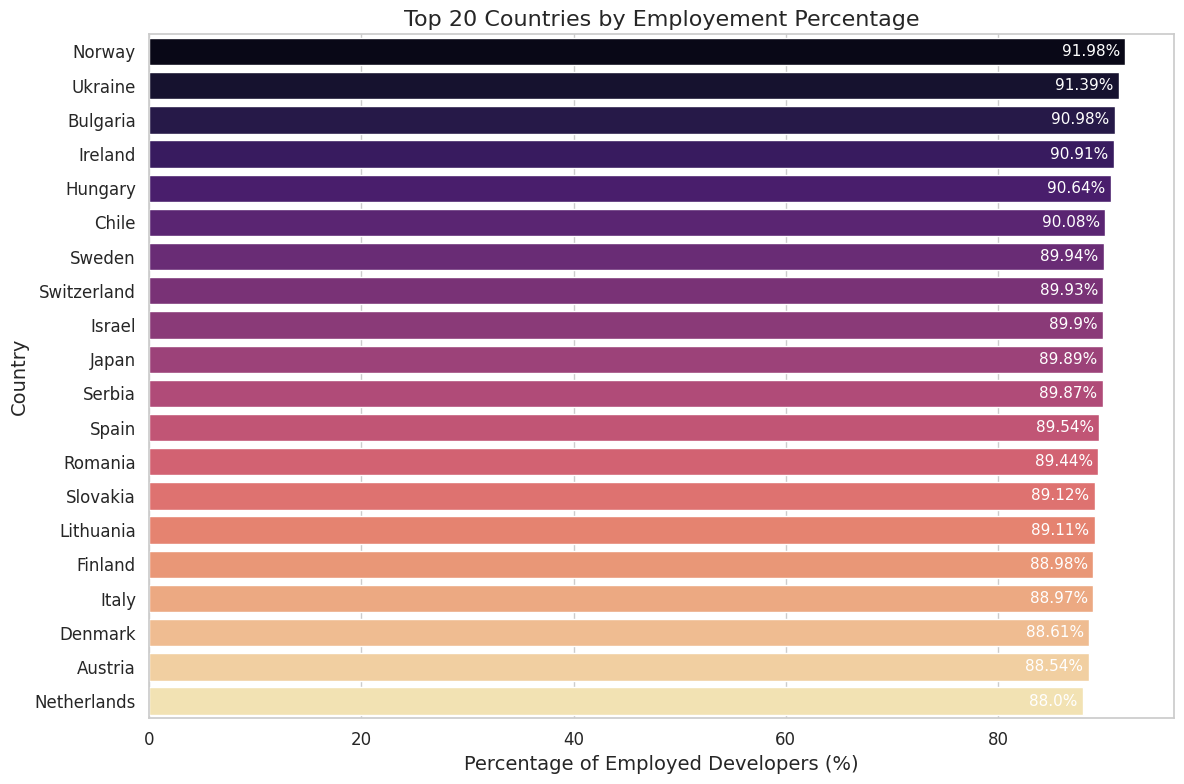

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=top20,
    x='Percent_employed',
    y='Country',
    palette=colors,
    hue='Country'
)

for index, value in enumerate(top20['Percent_employed']):
    plt.text(value - 0.5, index, f"{value}%", va='center', ha='right', fontsize=11, color='white')

plt.title('Top 20 Countries by Employement Percentage')
plt.xlabel('Percentage of Employed Developers (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

> this plot showcase the top 20 countries which have the most percentage of employeed devs

What is the `Education level` distribution for all the `employed devs` from `India`?

In [25]:
edLevel_data = clean_df.loc[ (clean_df['Country'] == 'India') & (clean_df['Employment'].isin(['Employed','Independent contractor, freelancer, or self-employed'])), 'EdLevel'].value_counts(normalize=True) * 100

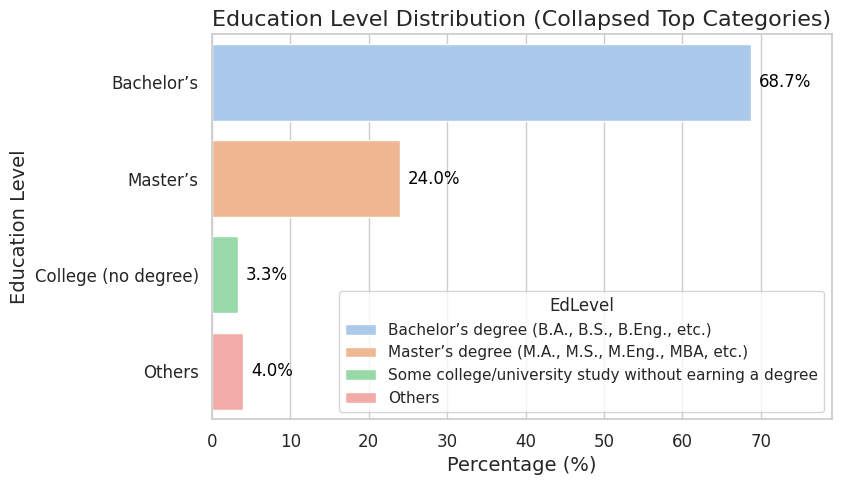

In [26]:
top_n = 3
top_data = edLevel_data.head(top_n)
others = edLevel_data.iloc[top_n:].sum()
top_data['Others'] = others
labels = ["Bachelor’s","Master’s","College (no degree)","Others"]

plt.figure(figsize=(8,5))
sns.barplot(
    x=top_data.values, 
    y=labels,
    hue=top_data.index,
    palette='pastel'
)

for i, v in enumerate(top_data.values):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(top_data)*1.15)
plt.title("Education Level Distribution (Collapsed Top Categories)")
plt.xlabel("Percentage (%)")
plt.ylabel("Education Level")
plt.show()

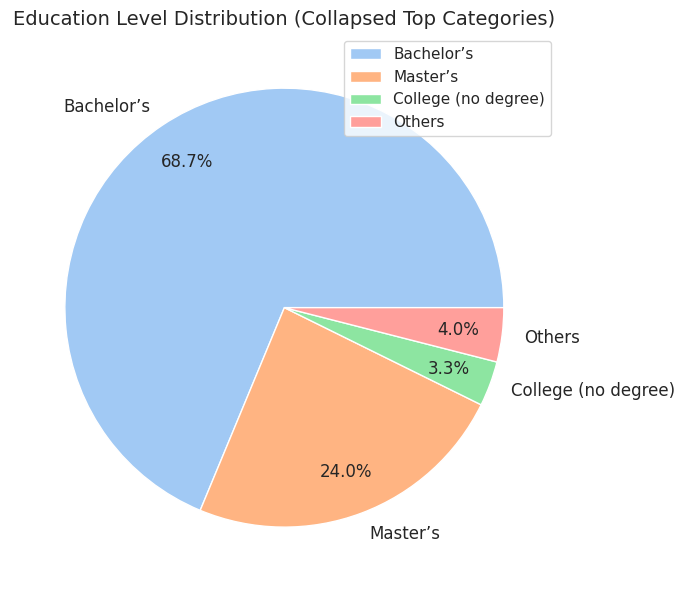

In [27]:
colors = sns.color_palette("pastel")[:4]  # soft, clean colors
plt.figure(figsize=(7,7))
plt.pie(
    top_data.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    pctdistance=0.8,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Education Level Distribution (Collapsed Top Categories)", fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Insights: 
- Most employed developers in India hold a Bachelor’s degree, making up nearly 70% of the group.
- Master’s degree holders form the second-largest segment at around 24%.
- All other education categories collectively account for less than 7%, indicating a highly degree-concentrated developer workforce.

#### 2.2 Dev Experience

Are `younger developers` entering the fields really heavily one some few `learning methods`?

In [42]:
learn_method_counter = Counter()

In [43]:
for lm in clean_df.loc[(clean_df['Age'].isin(['18-24 years old'])), 'LearningMethods'].dropna().str.split(';'):
    learn_method_counter.update(lm)

In [63]:
learn_young_df = pd.DataFrame(list(dict(learn_method_counter).items()), columns=['Category','Count'])

In [66]:
learn_young_df['Percentage'] = (learn_young_df['Count']/learn_young_df['Count'].sum()) * 100

In [75]:
list(learn_young_df['Category'])

['Online Courses or Certification (includes all media types)',
 'AI CodeGen tools or AI-enabled apps',
 'Colleague or on-the-job training',
 'Blogs or podcasts',
 'Coding Bootcamp',
 'Other online resources (e.g. standard search, forum, online community)',
 'Books / Physical media',
 'Videos (not associated with specific online course or certification)',
 'Stack Overflow or Stack Exchange',
 'Technical documentation (is generated for/by the tool or system)',
 'Games or coding challenges',
 'School (i.e., University, College, etc)',
 'Others']

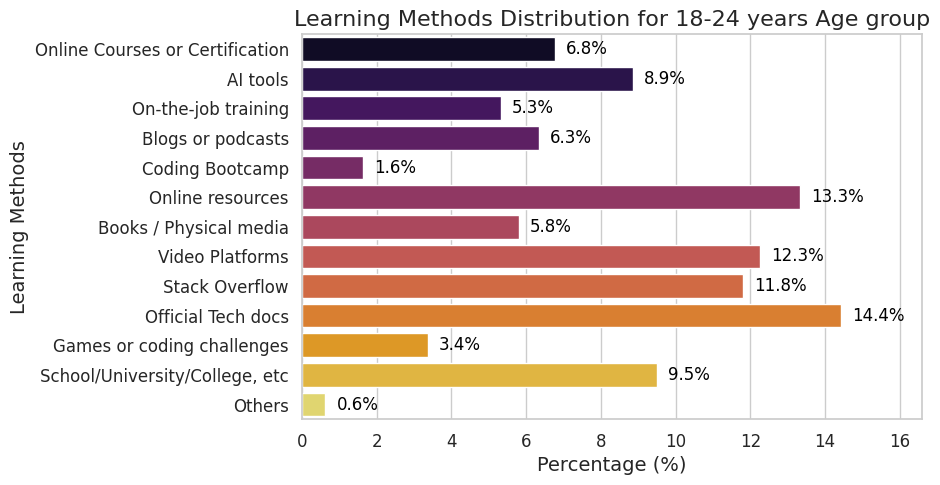

In [90]:
plt.figure(figsize=(8,5))
labels = ['Online Courses or Certification',
    'AI tools',
    'On-the-job training',
    'Blogs or podcasts',
    'Coding Bootcamp',
    'Online resources',
    'Books / Physical media',
    'Video Platforms',
    'Stack Overflow',
    'Official Tech docs',
    'Games or coding challenges',
    'School/University/College, etc',
    'Others']

ax = sns.barplot(
    x=learn_young_df['Percentage'],
    y=labels,
    hue=learn_young_df['Category'],
    palette='inferno'
)
ax.legend().remove()

for i, v in enumerate(learn_young_df['Percentage']):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(learn_young_df['Percentage'])*1.15)
plt.title("Learning Methods Distribution for 18-24 years Age group")
plt.xlabel("Percentage (%)")
plt.ylabel("Learning Methods")
plt.show()

Insights:
- Learning methods are fairly `evenly distributed`, with no single method dominating the preferences of young developers.
- `Coding bootcamps` stand out as an outlier, used by only `1.6%` of young developers — noticeably lower compared to all other learning options.

Does `Age` correlate to `job satisfaction`?

In [108]:
age_jobsat = clean_df.groupby(['Age'])['JobSat'].mean()
age_jobsat = age_jobsat[age_jobsat.index!='Prefer not to say']

In [116]:
age_jobsat_df = pd.DataFrame(age_jobsat.items(),columns=['Age', 'MeanJobsat'])
overall_mean = clean_df["JobSat"].mean()

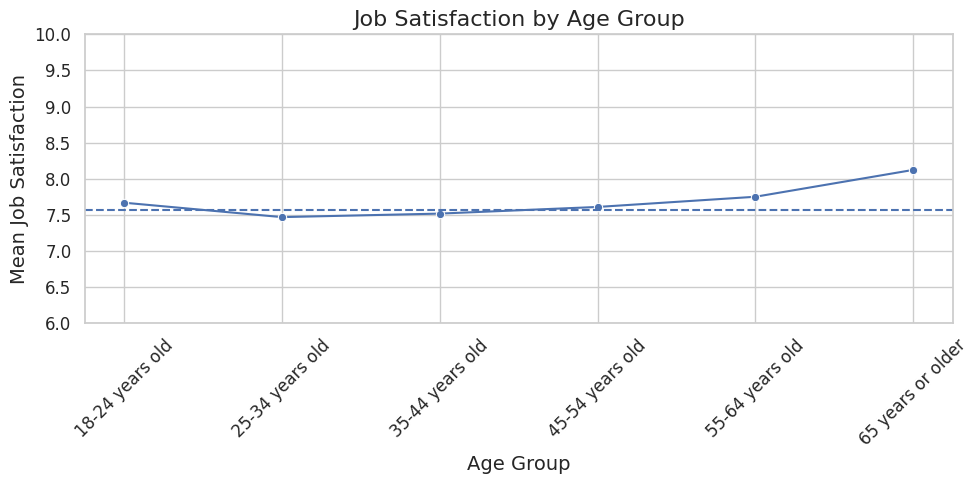

In [121]:
plt.figure(figsize=(10,5))
sns.lineplot(data=age_jobsat_df, x="Age", y="MeanJobsat", marker="o")

plt.axhline(overall_mean, linestyle="--")
plt.ylim(6, 10)
plt.title("Job Satisfaction by Age Group")
plt.ylabel("Mean Job Satisfaction")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

&emsp;Job satisfaction remains remarkably consistent across all age groups.  
&emsp;Even though there are minor fluctuations (e.g., slightly higher satisfaction in older groups), these differences are small   
&emsp;and practically insignificant. The line plot confirms that age does not meaningfully influence job satisfaction in this dataset.

Which `DevType` groups show the highest likelihood of looking for new roles?

In [170]:
young_devtype = clean_df[(clean_df['Age'] == '18-24 years old') & ~clean_df['DevType'].isin(['Student','Others'])]['DevType'].value_counts()

In [172]:
young_devtype_df = pd.DataFrame(young_devtype.items(),columns=['DevType','count'])
young_devtype_df['Percent'] = (young_devtype_df['count']/young_devtype_df['count'].sum()) * 100

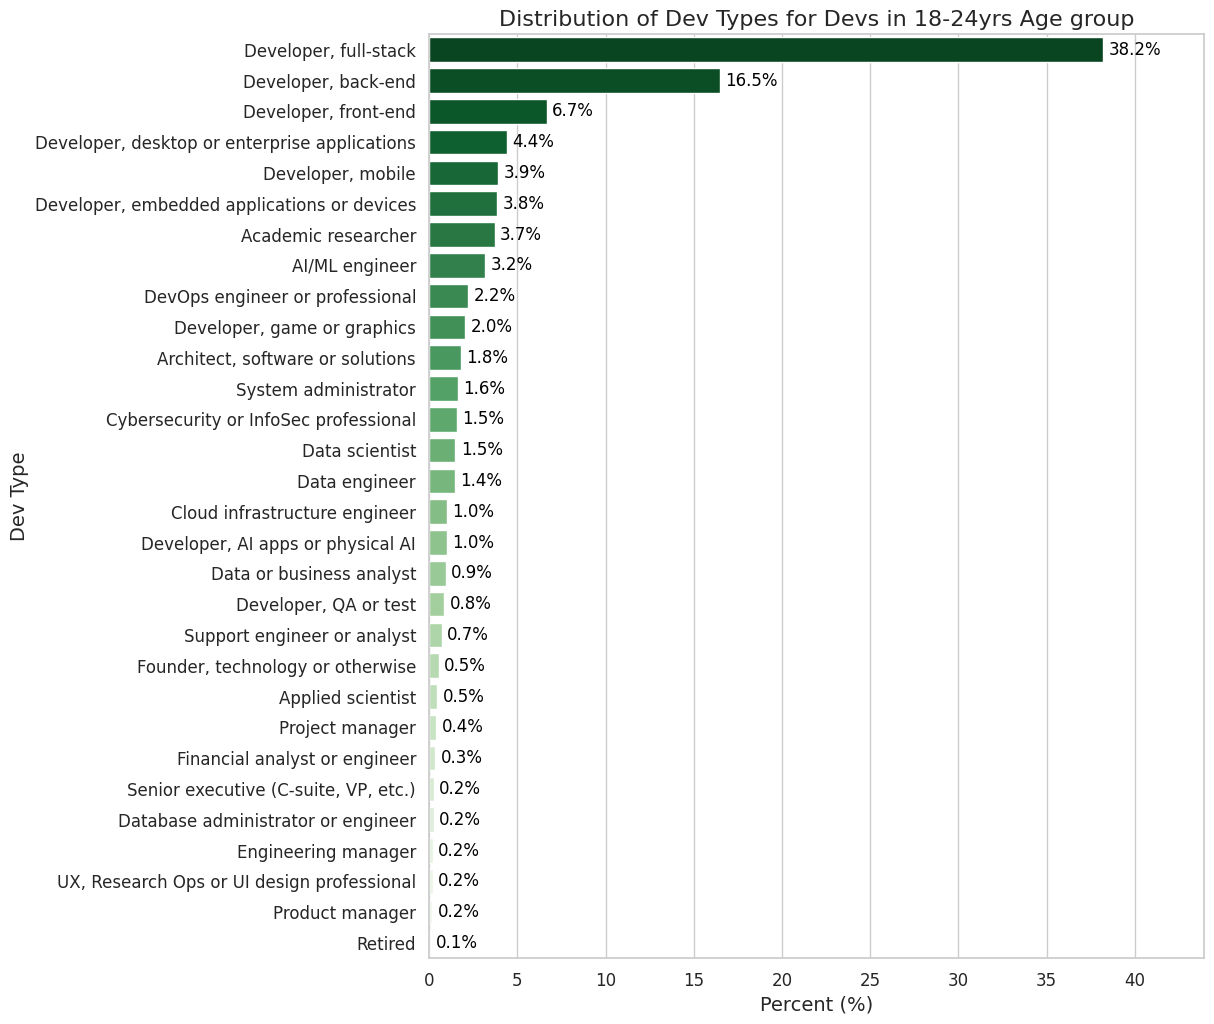

In [185]:
palette = sns.color_palette("Greens", n_colors=len(young_devtype_df))
palette = palette[::-1]

plt.figure(figsize=(10, 12))
sns.barplot(
    data=young_devtype_df.sort_values('Percent', ascending=False),
    y='DevType',
    x='Percent',
    hue='DevType',
    palette=palette
)

for i, v in enumerate(young_devtype_df['Percent']):
    plt.text(v + 0.3, i, f"{v:.1f}%", va='center', color='black')

plt.xlim(0, max(young_devtype_df['Percent'])*1.15)
plt.xlabel('Percent (%)')
plt.ylabel('Dev Type')
plt.title('Distribution of Dev Types for Devs in 18-24yrs Age group')
plt.show()

Insights:  
  
&emsp;A significant share of young developers work in full-stack, front-end, or back-end roles,  
&emsp;which together account for 61.4% of the group.  
&emsp;This indicates that these domains remain the most common entry-level pathways for early-career developers.

How `coding experience` correlates to salary?

In [198]:
code_salary = clean_df.loc[(clean_df['AnnualSalary(USD)'].notna()), ['YearsCode','AnnualSalary(USD)']].groupby('YearsCode')['AnnualSalary(USD)'].mean()

In [242]:
code_salary_df = pd.DataFrame(code_salary.items(),columns=['YearsCode','AvgSalary'])
code_salary_df['AvgSalary'] = round(code_salary_df['AvgSalary'], 2)
clean_code_salary_df = code_salary_df[code_salary_df['YearsCode'] <= 60]
mean_salary = clean_df['AnnualSalary(USD)'].dropna().mean()

In [246]:
mean_salary

np.float64(115665.582)

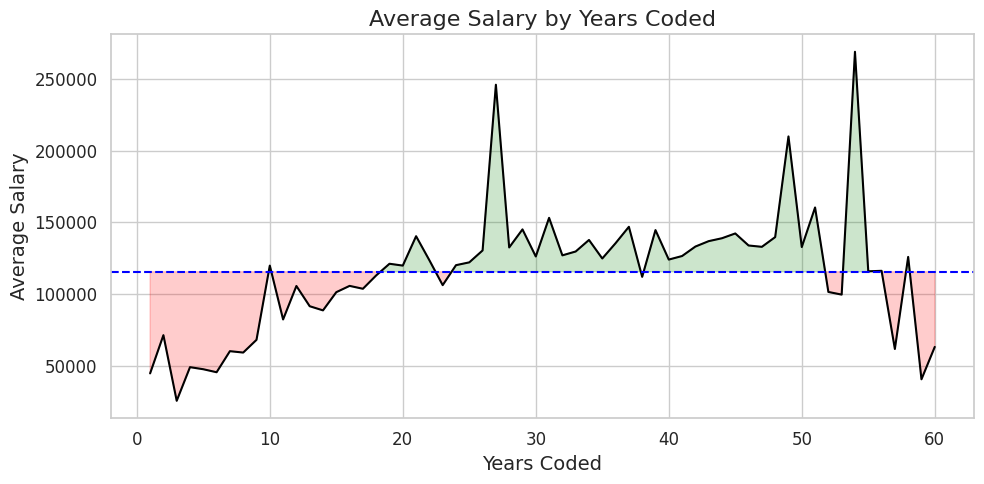

In [245]:
plt.figure(figsize=(10,5))
x = clean_code_salary_df['YearsCode']
y = clean_code_salary_df['AvgSalary']
mean_salary = y.mean()

ax = sns.lineplot(data=clean_code_salary_df, x="YearsCode", y="AvgSalary", label='Avg Salary', color='black')
plt.axhline(mean_salary, linestyle="--", label='Mean Salary', color='blue')

plt.fill_between(x, y, mean_salary,
                 where=(y > mean_salary),interpolate=True,
                 color="green", alpha=0.2, label="Above Mean")
plt.fill_between(x, y, mean_salary,
                 where=(y < mean_salary),interpolate=True,
                 color="red", alpha=0.2, label="Below Mean")

ax.legend().remove()
plt.title("Average Salary by Years Coded")
plt.ylabel("Average Salary")
plt.xlabel("Years Coded")
plt.tight_layout()
plt.show()

Insights: 
   
&emsp;The average salary stays consistently below the survey-wide mean annual salary ($115,665.58)   
&emsp;for respondents with less than 20 years of experience.  
&emsp;Beyond the 20-year mark, the average salary remains consistently above the mean, and the gap increases noticeably as experience grows.